In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("gas_turbines.csv")
df.shape

(15039, 11)

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

## Visualization

<Axes: >

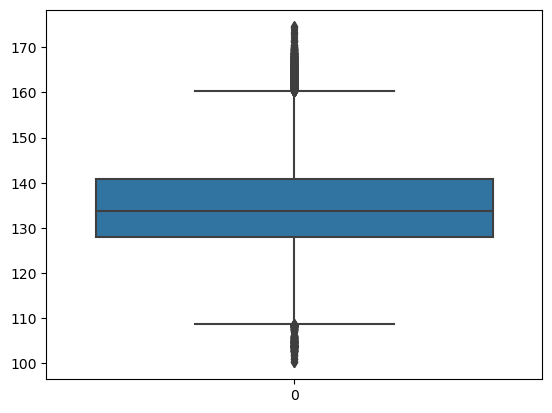

In [7]:
sns.boxplot(df['TEY'])

In [8]:
x=df.drop('TEY', axis=1)
y=df[['TEY']]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [9]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


## Data Standardization

In [10]:
data = StandardScaler()
data.fit(x)

StandardScaler()

In [11]:
x_std = data.transform(x)
pd.DataFrame(x_std)

,0,1,2,3,4,5,6,7,8,9
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


## Define Model

In [12]:
def create_model(learning_rate , dropout_rate, activation_functon, init,neuron1,neuron2):
    model=sequential()
    model.add(Dense(neuron1,initdim=neuron1,kernal_initializer=init,activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,initdim=neuron1,kernal_initializer=init,activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='Sigmoid'))
    adam=Adam(lr=lerning_rate)
    model_compile(loss='binary_crossentropy',optimizer=adam.metrics['accuracy'])
    return model

In [13]:
#Define Gridsearch parametres
batch_size=[10,20,40]
epochs=[10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]
activation_function=['softmax','relu','tanh','linear']
init=['unifrom','normal','zero']
neuron1=[4,8,16]
neuron2=[2,4,8]

In [14]:
modell = Sequential()

In [15]:
param_grid=dict(batch_size=batch_size,epochs=epochs,learning_rate=learning_rate,dropout_rate=dropout_rate,activation_function=activation_function,init=init,neuron1=neuron1,neuron2=neuron2)

In [16]:
grid=GridSearchCV(estimator=modell,param_grid=param_grid,cv=KFold(),verbose=10)

grid

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<Sequential name=sequential, built=False>,
             param_grid={'activation_function': ['softmax', 'relu', 'tanh',
                                                 'linear'],
                         'batch_size': [10, 20, 40],
                         'dropout_rate': [0.0, 0.1, 0.2],
                         'epochs': [10, 50, 100],
                         'init': ['unifrom', 'normal', 'zero'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'neuron1': [4, 8, 16], 'neuron2': [2, 4, 8]},
             verbose=10)

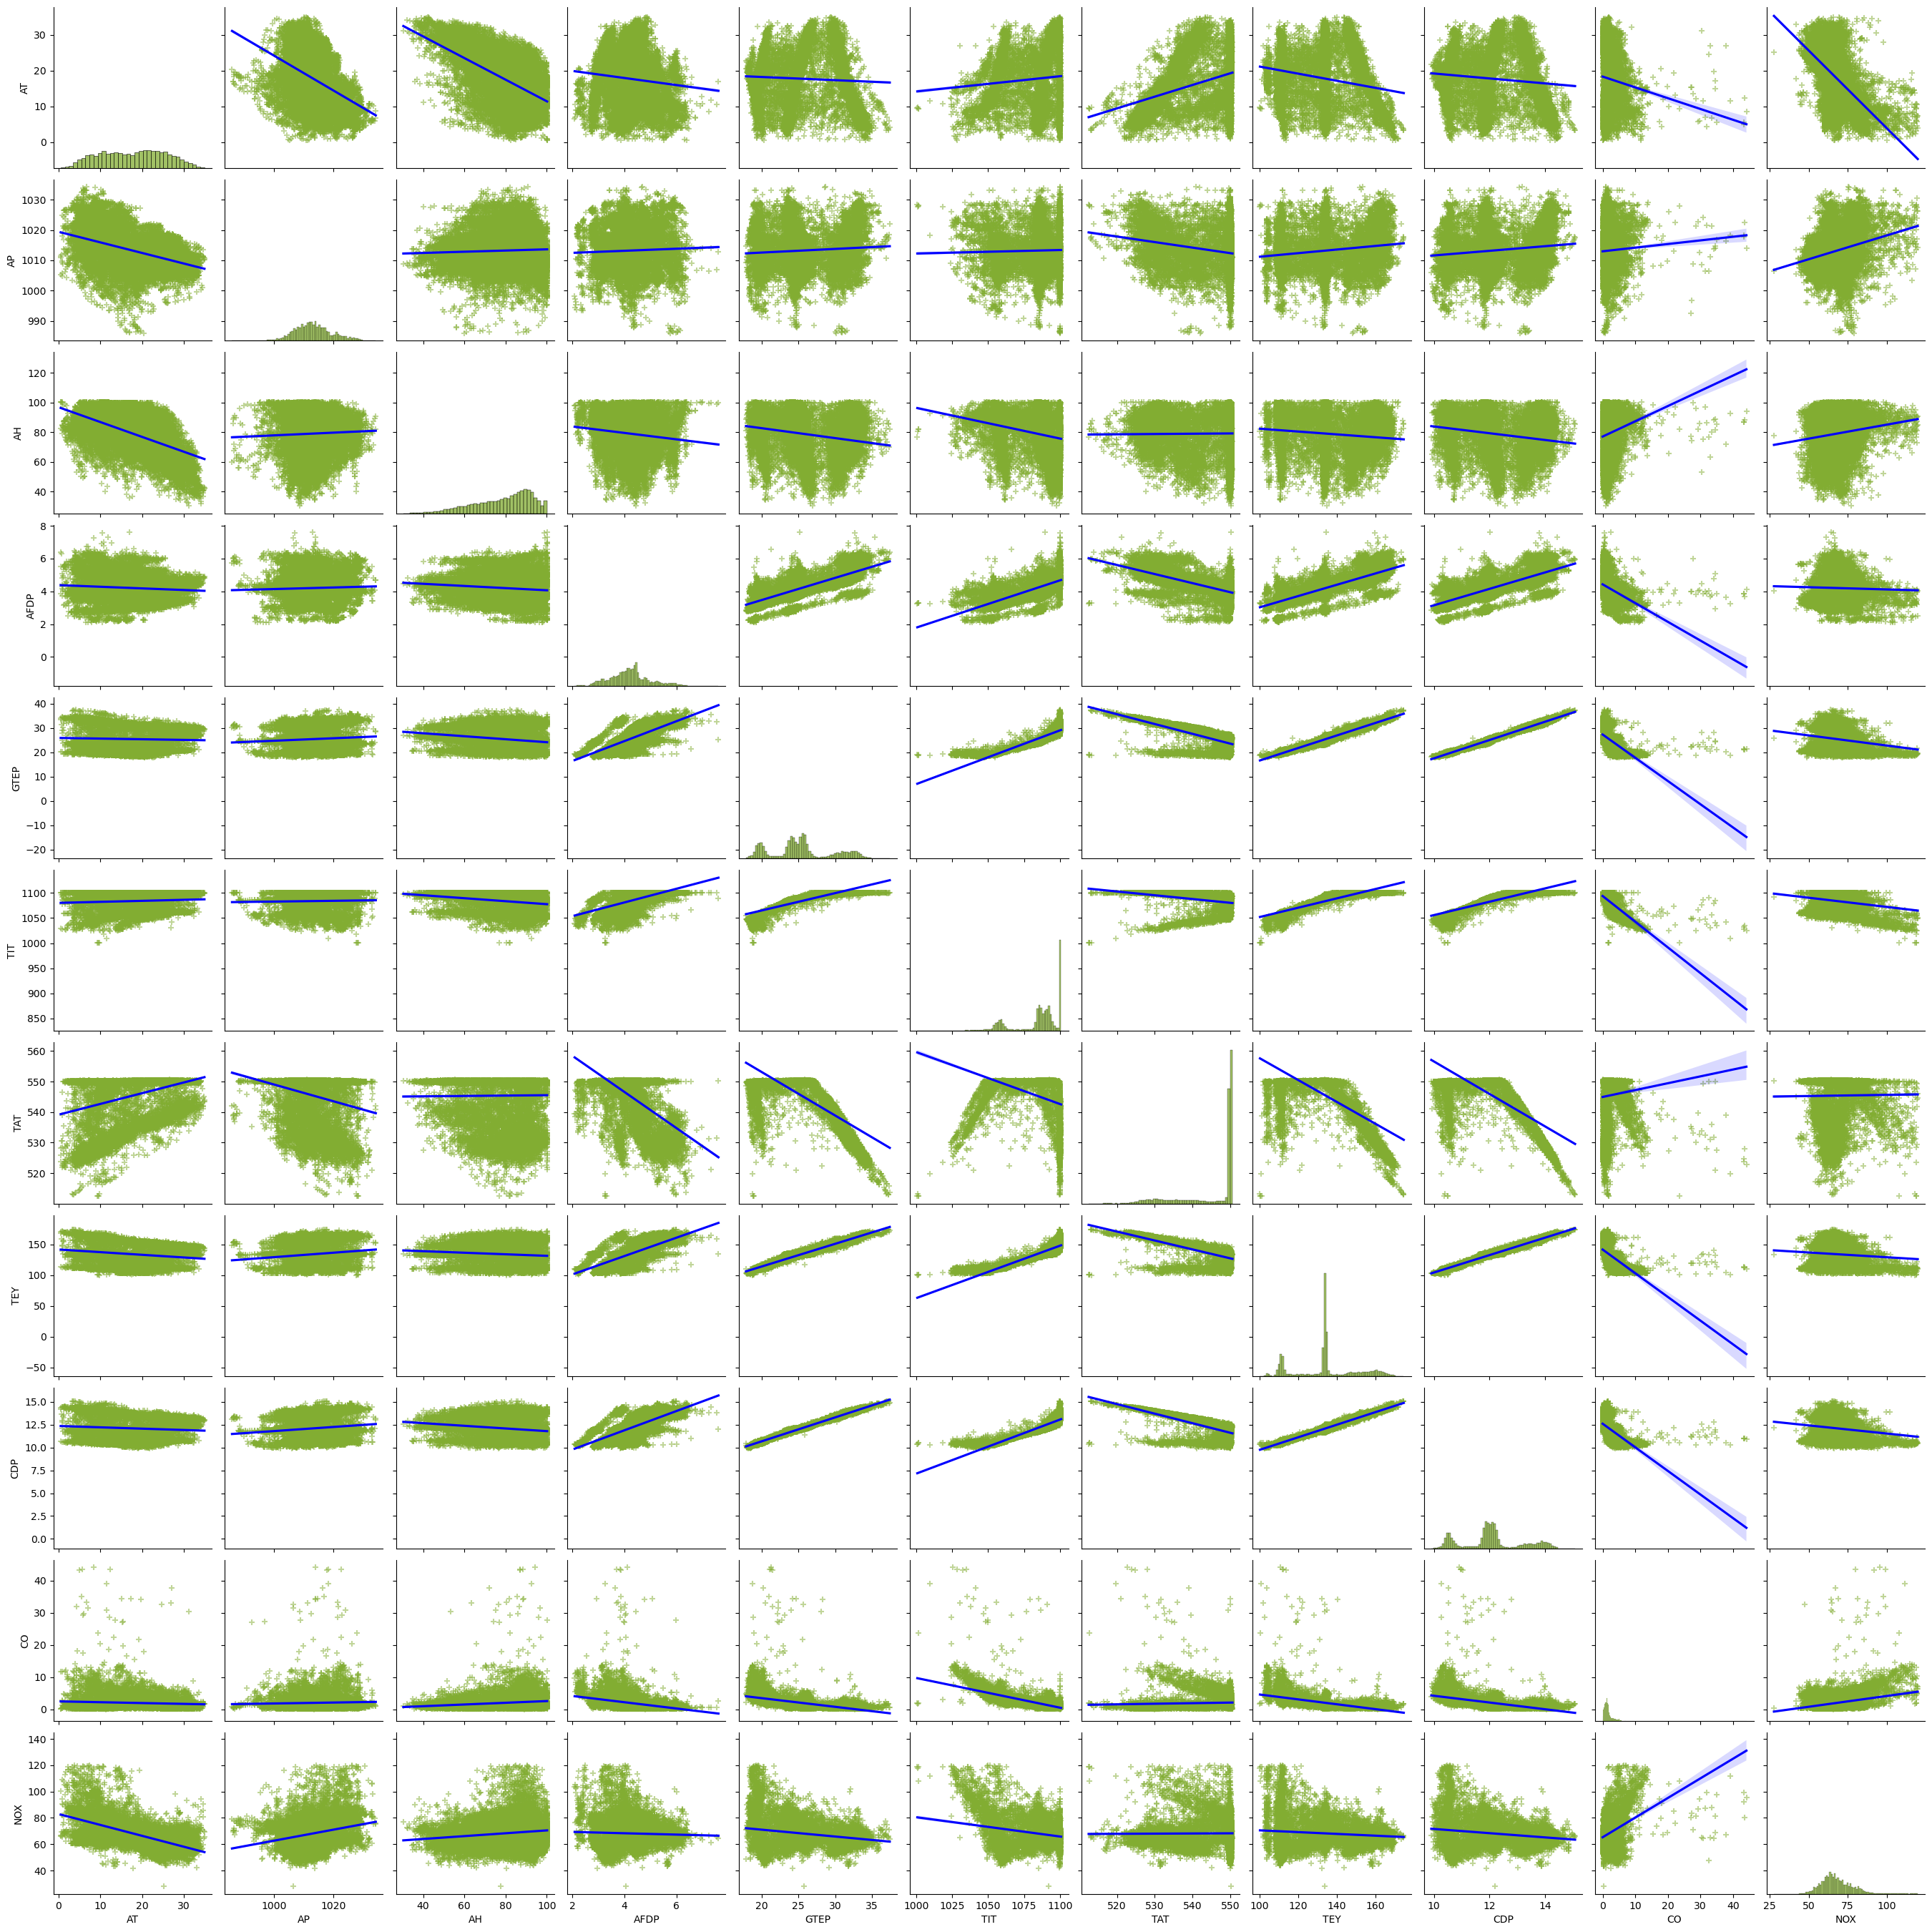

In [17]:
sns.pairplot(df,
                markers = '+',
                kind = 'reg',
                diag_kind = "auto",
                plot_kws = {'line_kws':{'color':'Blue'},
                            'scatter_kws' : {'alpha' : 0.5, 'color' : '#82ad32'}},
                diag_kws = {'color' : '#82ad32'})

<Axes: >

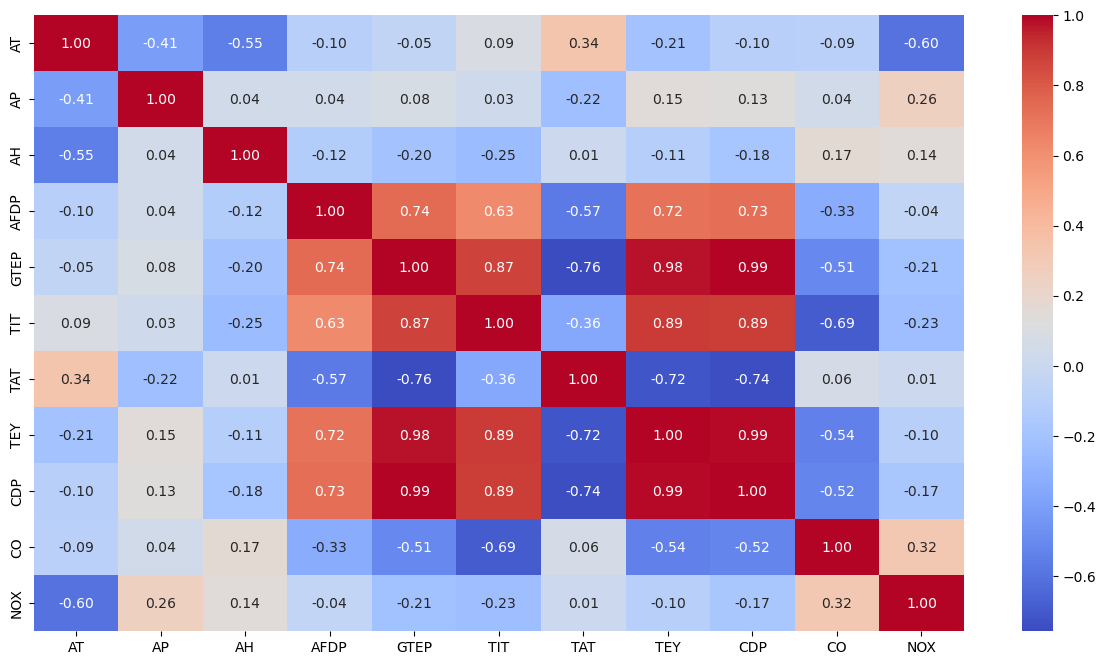

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [20]:
X = df.drop(columns = ['TEY'], axis = 1)
Y = df.iloc[:,7]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,test_size= 0.1, random_state = 42)
Xtrainscaled = scale(Xtrain)
Xtestscaled = scale(Xtest)
Xtestscaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [21]:
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([

                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(output_size)
                             ])

In [22]:
Xtrainscaled.shape

(13535, 10)

In [23]:
ytrain.shape

(10527, 1)

In [24]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(Xtrainscaled, Ytrain, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 2s - 5ms/step - MeanSquaredError: 2856.9985 - loss: 2856.9985 - val_MeanSquaredError: 182.4754 - val_loss: 182.4754
Epoch 2/100
381/381 - 0s - 1ms/step - MeanSquaredError: 102.4778 - loss: 102.4778 - val_MeanSquaredError: 81.0507 - val_loss: 81.0507
Epoch 3/100
381/381 - 0s - 1ms/step - MeanSquaredError: 48.1155 - loss: 48.1155 - val_MeanSquaredError: 37.1578 - val_loss: 37.1578
Epoch 4/100
381/381 - 0s - 1ms/step - MeanSquaredError: 22.5980 - loss: 22.5980 - val_MeanSquaredError: 17.4917 - val_loss: 17.4917
Epoch 5/100
381/381 - 0s - 1ms/step - MeanSquaredError: 10.2762 - loss: 10.2762 - val_MeanSquaredError: 7.3512 - val_loss: 7.3512
Epoch 6/100
381/381 - 0s - 1ms/step - MeanSquaredError: 5.3878 - loss: 5.3878 - val_MeanSquaredError: 4.0320 - val_loss: 4.0320
Epoch 7/100
381/381 - 0s - 1ms/step - MeanSquaredError: 2.9609 - loss: 2.9609 - val_MeanSquaredError: 2.5381 - val_loss: 2.5381
Epoch 8/100
381/381 - 0s - 1ms/step - MeanSquaredError: 1.8330 - loss: 1.8330 

In [25]:
test_loss, mean_squared_error = model.evaluate(Xtestscaled, Ytest)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MeanSquaredError: 0.9170 - loss: 0.9170 


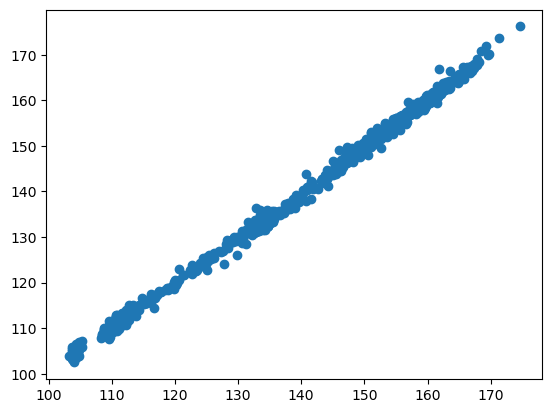

In [26]:
predictions = model.predict_on_batch(Xtestscaled)
plt.scatter(Ytest, predictions)

In [27]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = Ytest
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.078247,0.283916
1,111.88,112.698380,0.731480
2,133.72,133.856415,0.102015
3,133.79,133.869232,0.059221
4,110.77,111.774628,0.906949
...,...,...,...
1499,132.85,132.583069,0.200927
1500,125.07,122.750671,1.854424
1501,160.95,161.455566,0.314114
1502,133.12,132.912048,0.156214
